In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go #plotly for interactive plots
from joblib import load


# Load merged data
df = load("C:/Users/DELL/Documents/Data Science and Analytics/Mini Capstone/minic/Database/merged_wif_data.joblib")


fig = go.Figure()

# Bar chart for whale transactions
fig.add_trace(go.Bar(
    x=df['date'],
    y=df['whale_tx_count'],
    name='Whale Tx Count',
    marker_color='skyblue',
    yaxis='y1'
))

# Line chart for token price
fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['price'],
    name='Price',
    mode='lines+markers',
    line=dict(color='red'),
    yaxis='y2'
))

# Layout configuration
fig.update_layout(
    title='Daily Whale Transactions and Token Price ($WIF) - Last 30 Days',
    xaxis=dict(title='Date'),
    yaxis=dict(
        title='Whale Tx Count',
        titlefont=dict(color='skyblue'),
        tickfont=dict(color='skyblue'),
    ),
    yaxis2=dict(
        title='Price (USD)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    bargap=0.3
)

fig.show()


### Insight:

- Whale activity appears to lead or coincide with price direction, especially during volatile moves.
- When whales withdraw (less activity), price tends to flatten or decline.
- When whales surge in, price often follows up, confirming whales as market movers.

This supports using whale behavior as a potential indicator for forecasting price trends.

### Correlation Matrix and Price Change Analysis

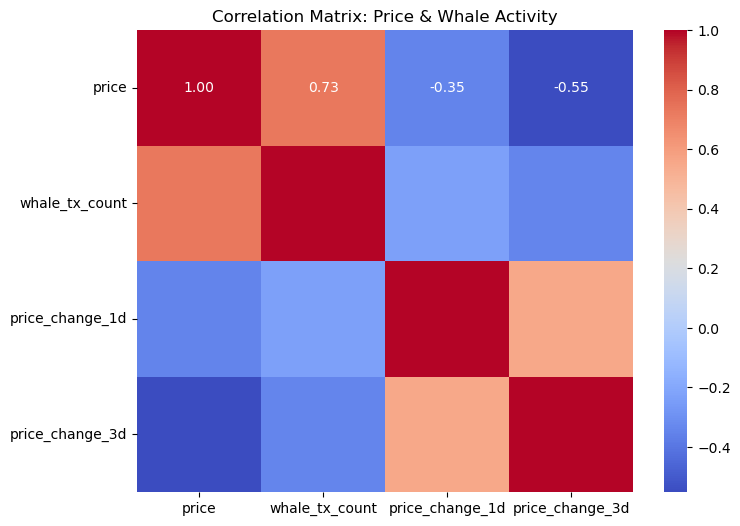

In [20]:
import seaborn as sns

# Calculate 1-day and 3-day price changes
df['price_change_1d'] = df['price'].shift(-1) - df['price']
df['price_change_3d'] = df['price'].shift(-3) - df['price']

# Drop rows with NaNs due to shifting
df_clean = df.dropna(subset=['price_change_1d', 'price_change_3d'])

# Correlation matrix
corr = df_clean[['price', 'whale_tx_count', 'price_change_1d', 'price_change_3d']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price & Whale Activity')
plt.show()


#### Insight: 

From the Correlation Matrix above, whale transactions are strongly correlated with $WIF's price level, but not necessarily with short-term price changes (hourly deltas). This means that whales might not cause immediate volatility, but their presence is related to sustained price levels.

### Price Change Distribution

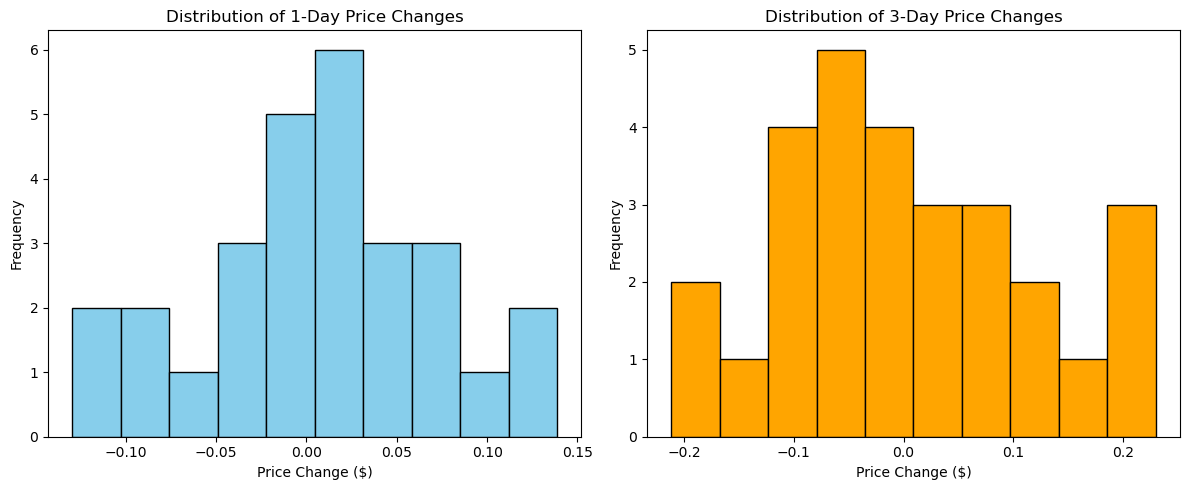

In [21]:
# Histogram of price changes (1d and 3d)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean['price_change_1d'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of 1-Day Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_clean['price_change_3d'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of 3-Day Price Changes')
plt.xlabel('Price Change ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()